# German Credit Data

## Brief History

German Credit Data is a dataset in UCI Repositary having information of credit of various customers. Our task is to segregate customers into Good Credit customers and Bad Credit customers. The data is very extensive and consists of 20 attributes, maily categorical. The dataset was provided by Prof. Hofmann and contains categorical/symbolic attributes.

## Exercise

**1. Data Preprocessing:**
    
   * Rename the columns with the following names to increase readability:
    
'checkin_acc', 'duration', 'credit_history', 'purpose', 'amount', 'saving_acc', 'present_emp_since', 'inst_rate',  'personal_status', 'other_debtors', 'residing_since', 'property', 'age', 'inst_plans', 'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'good/bad'

   * Perform Data Preprocessing, convert "good/bad" column into categorical variable, 1 as good credit and 0 as bad credit
   

**2. Exploratory Data Analysis:**

(In all of the graphs below, make two graphs where ever required, one for "Good" credit and another one for "Bad" credit)
   
   * Find number of people with Good vs Bad credit (use countplot)
   * Find the amount dispursed to customers (make 2 plots, use distplot and then use KDE plot)
   * Find the age distribution for the borrowers (use KDE plot)
   * Plot and find out if higher amounts leads to higher default rate (use pairplot)
   * Find credit amount for different types of checking's account for both Good/Bad credit (use bar plot, and provide a legend for different types of account)
   
   Hint: In-order to show legend use plt.figtext() for example in this case:
   ```python
   plt.figtext(1, 0.5, """A11 : < 0 DM \n A12 : 0 <= ... < 200 DM \n A13 : >= 200 DM \n A14 : no checking account 
   """, wrap=True, horizontalalignment='left', fontsize=12)
   ```
   * Plot credit history vs Good/Bad credit (use barplot, provide legend)
   * Plot credit purpose vs Good/Bad credit (use barplot, provide legend)
   * Find relationship between credit amount and duration of time (use lmplot)
   * Plot personal status vs Good/Bad credit (use barplot, provide legend)
   * Plot property vs Good/Bad credit (use barplot, provide legend)
   
**Recommended reading:**

   * Seaborn visualization techniques - http://seaborn.pydata.org/examples/
   
**3. Model Fitting:**
    
   * Convert all categorical variables into dummy variable (use pd.get_dummies)
   * Separate target variable (initialize variable= "y") ("good/bad") from dependent variable (initialize variable= "x")
   * Standardize and Scale
   * Split into train and test (use train_test_split())
   * Fit multiple models such as Logestic Regression, KNN, Decision Tree, Naive Bayes, SVM 
   * Comapre the model and use the one with highest accuracy
   * Plot ROC curve

**Recommended reading:**

   * For pd.get_dummies(), refer: http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html
   * For standardizing and Scaling, refer: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
   * For Train test split, refer: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
   * For fitting multiple models, refer: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
   * For ROC Curves, refer: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [18]:
german_data = pd.read_csv('german.txt',sep=" ")
german_data.head(4)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,PREDICTOR
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


We can see that there are no column names, so lets start by introducing more user friendly column names.

In [19]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
         'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
         'other_debtors', 'residing_since', 'property', 'age',
         'inst_plans', 'housing', 'num_credits',
         'job', 'dependents', 'telephone', 'foreign_worker', 'good/bad']
german_data.columns = columns
german_data.head(3)

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,good/bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


# Solution

### Converting our dependent variable into categorical variable so as to use it for plotting -

In [20]:
german_data["status"] =  np.where(german_data['good/bad'] == 1, "Good", "Bad")
german_data.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,good/bad,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,2,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,1,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,1,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,2,Bad


### Frequency or number of people with Good vs Bad credit

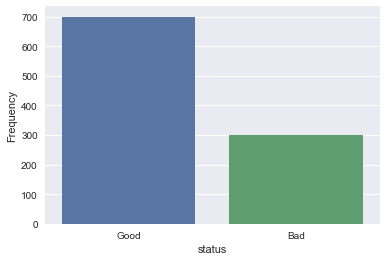

In [21]:
sns.set(style="darkgrid")
sns.countplot(x="status", data=german_data)
plt.ylabel( "Frequency")
plt.show()

Lets see the amount of credit amount dispursed with the help of a histogram, this will help us to know what usually is the amount being borrowed!

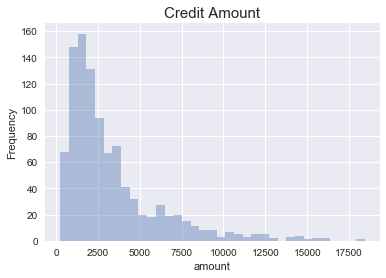

In [22]:
sns.distplot(german_data.amount, kde = False )
plt.title("Credit Amount", fontsize = 15)
plt.ylabel("Frequency")
plt.show()

### Density Plot of Amount Borrowed by good/bad Credit Customers

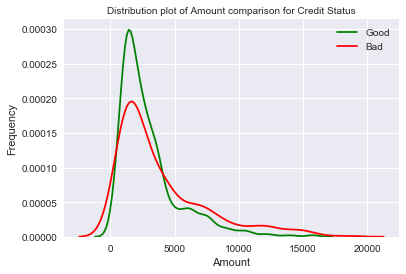

In [23]:
sns.kdeplot(german_data[german_data['good/bad'] == 1].amount, color = 'g', label="Good")
sns.kdeplot(german_data[german_data['good/bad'] == 2].amount, color = 'r', label="Bad")
plt.title("Distribution plot of Amount comparison for Credit Status", fontsize = 10)
plt.ylabel("Frequency")
plt.xlabel("Amount")
plt.legend();
plt.show()

### Age of Borrowers 

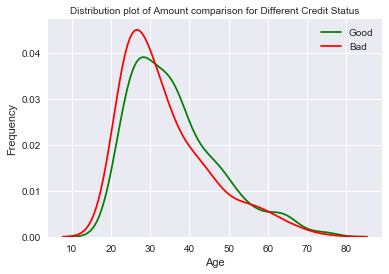

In [24]:
sns.kdeplot(german_data[german_data['good/bad'] == 1].age, color = 'g', label="Good")
sns.kdeplot(german_data[german_data['good/bad'] == 2].age, color = 'r', label="Bad")
plt.title("Distribution plot of Amount comparison for Different Credit Status", fontsize = 10 )
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.legend();
plt.show()

### Does Higher Amount Lead to Higher Default Rate?

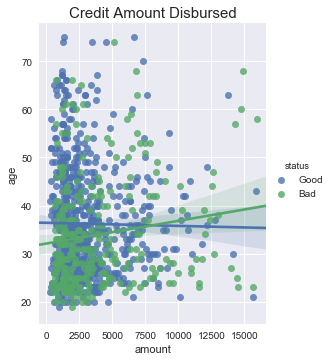

In [25]:
sns.set(style="darkgrid")
sns.pairplot(german_data, x_vars=["amount"], y_vars=["age"],
             hue="status", size=5, aspect=.8, kind="reg")
plt.title( "Credit Amount Disbursed", fontsize = 15)
plt.show()

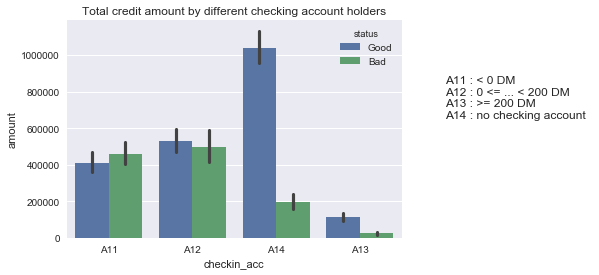

In [26]:
sns.barplot( x = 'checkin_acc',y = 'amount',hue = 'status', 
            data = german_data, estimator = sum )
plt.title( "Total credit amount by different checking account holders")
plt.figtext(1, 0.5,"""A11 : < 0 DM \n A12 : 0 <= ... < 200 DM \n A13 : >= 200 DM \n A14 : no checking account 
""", wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

### Customers having no checkin account seems to have lesser chance of making a default where as customers having checkin accoun without any balance have higher chance of making a default.

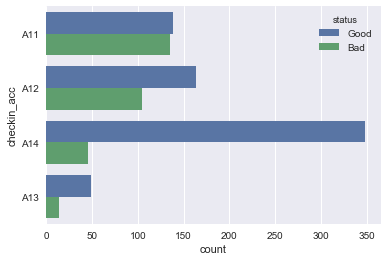

In [27]:
sns.countplot(y = 'checkin_acc', hue = 'status', data = german_data)
plt.show()

### Lets see the Impact of credit history on bad credits -

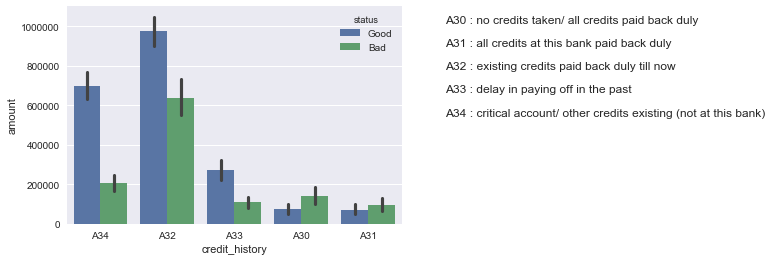

In [28]:
figure_text = """A30 : no credits taken/ all credits paid back duly \n
A31 : all credits at this bank paid back duly \n
A32 : existing credits paid back duly till now \n
A33 : delay in paying off in the past \n
A34 : critical account/ other credits existing (not at this bank) """
sns.barplot( x = 'credit_history', y = 'amount', hue = 'status', data = german_data,
            estimator = sum )
plt.figtext(1, 0.5,figure_text, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

### Analyzing Impact of Credit Purpose on Bad Credit

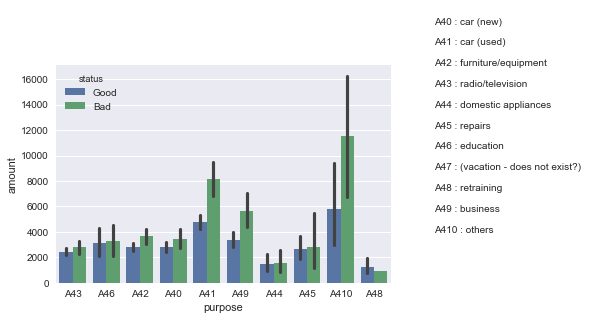

In [29]:
purpose_text = '''
A40 : car (new) \n
A41 : car (used) \n
A42 : furniture/equipment \n
A43 : radio/television \n
A44 : domestic appliances \n 
A45 : repairs \n
A46 : education\n
A47 : (vacation - does not exist?) \n
A48 : retraining \n
A49 : business \n
A410 : others '''
sns.barplot( x = 'purpose', y = 'amount', hue = 'status', data = german_data)
plt.figtext(1, 0.3,purpose_text, wrap=True, horizontalalignment='left', fontsize=10)
plt.show()

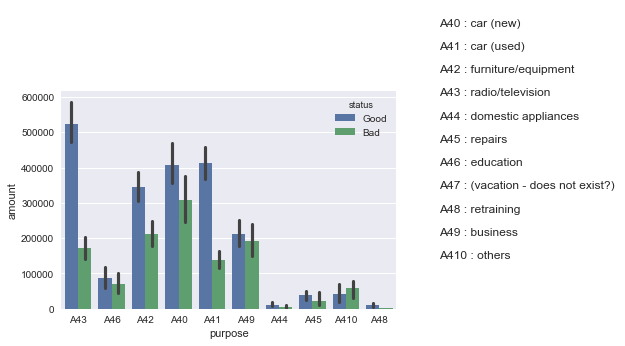

In [30]:
sns.barplot( x = 'purpose', y = 'amount', hue = 'status', data = german_data, estimator = sum )
plt.figtext(1, 0.3,purpose_text, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

### Relationship Between Credit amount and Time

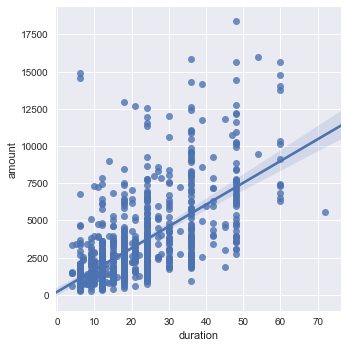

In [31]:
sns.lmplot( x = 'duration', y = 'amount',fit_reg = True, data = german_data)
plt.show()

### Does Personal Status Impact  Credit

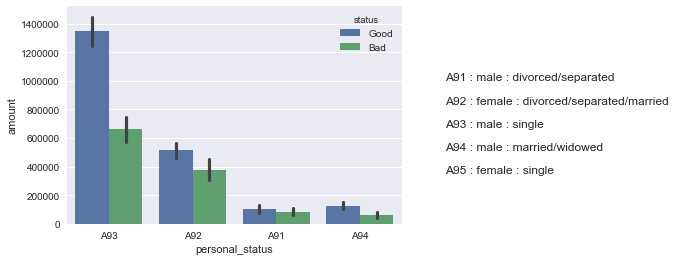

In [32]:
personal_text = '''A91 : male : divorced/separated \n
A92 : female : divorced/separated/married \n
A93 : male : single \n
A94 : male : married/widowed \n
A95 : female : single'''
sns.barplot( x = 'personal_status', y = 'amount', hue = 'status', 
            data = german_data, estimator = sum )
plt.figtext(1, 0.3,personal_text, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

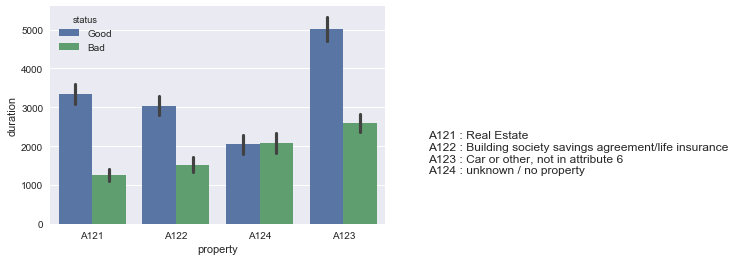

In [33]:
property_text = '''A121 : Real Estate
A122 : Building society savings agreement/life insurance
A123 : Car or other, not in attribute 6
A124 : unknown / no property'''
sns.set(style="darkgrid")
sns.barplot( x = 'property', y = 'duration', hue = 'status', data = german_data, estimator=sum )
plt.figtext(1, 0.3,property_text, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

We can see from above that - **Customers having Real Estate property seems to have lesser chance of making a default where as customers having a car have higher chance of making a default.**

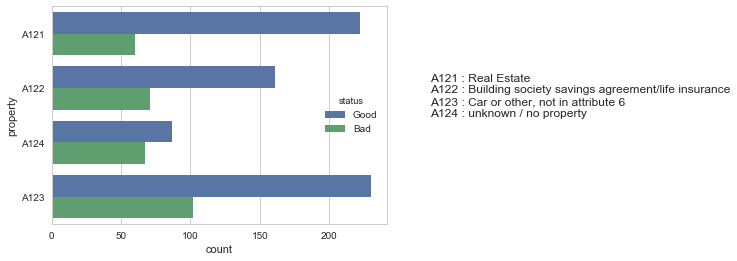

In [34]:
sns.set(style="whitegrid")
sns.countplot(y = 'property', hue = 'status', data = german_data)
plt.figtext(1, 0.5,property_text, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

Droping Status column and Updating Values of Good credit and Bad credit for use in Alogorithms ahead. Now the Updated values would be - Good=0, Bad=1.
We also convert the Categorical variables into Dummy variables

In [35]:
try:
    german_data = german_data.drop("status",1)
except:
    print("status field dropped")
german_data.head(5)
german_data['good/bad'] = german_data['good/bad']-1

df = pd.get_dummies(german_data, prefix=['checkin_acc', 'credit_history', 'purpose','saving_acc', 'present_emp_since', 'personal_status',
         'other_debtors', 'property','inst_plans', 'housing','job', 'telephone', 'foreign_worker'], columns=['checkin_acc', 'credit_history', 'purpose','saving_acc', 'present_emp_since', 'personal_status',
         'other_debtors', 'property','inst_plans', 'housing','job', 'telephone', 'foreign_worker'])
df.head(5)

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,good/bad,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0


We will separate the Target variable from independent variables and then proceed with standardizing the dataset by performing the scaling function. Then we will divide the dataset into train and test. We will also check for any correlation in the model so as to further optimize its performance. 

In [36]:
X=df.drop('good/bad',1)
Y=df['good/bad']

#Standardizing the dataset
names = list(X.columns.values)
num=names[:5]
cat=names[5:]

#Performing the Scaling funcion
X_scale=pd.DataFrame(scale(X[num]))
X_scale.columns = num
X=pd.concat((X_scale,X[cat]), axis=1)

#Dividing the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

## Model Selection

['LR: 0.750000 (0.043448)', 'KNN: 0.727143 (0.029589)', 'CART: 0.682857 (0.031816)', 'NB: 0.698571 (0.082919)', 'SVM: 0.731429 (0.045981)']


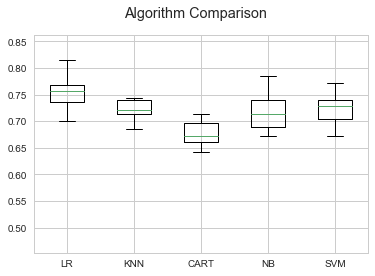

In [37]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
seed = 7
scoring = 'accuracy'
results = []
names = []
accuracy_scores = list()

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    pd.DataFrame(accuracy_scores.append(msg))

#Printing the accuracy achieved by each model    
print(accuracy_scores)

#PLotting the model comparision as box plot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that Logistic Regression gives us best accuracy, hence we will use it to make predictions on the test dataset. We have printed the confusion matrix and Classification report of the model.

In [38]:
# Make predictions on Test dataset using the best Model - Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

#Printing Accuracy, Confusion Matrix and Classification report

best_score = accuracy_score(y_test, predictions)
print(best_score)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7433333333333333
[[177  37]
 [ 40  46]]
             precision    recall  f1-score   support

          0       0.82      0.83      0.82       214
          1       0.55      0.53      0.54        86

avg / total       0.74      0.74      0.74       300



## Finding ROC charactorstics and AUC

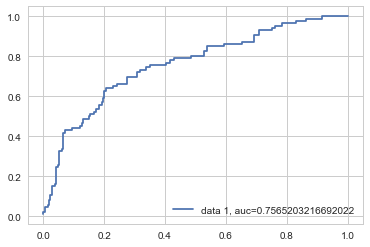

In [41]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()